In [1]:
from sklearn.metrics.pairwise import euclidean_distances
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
import pandas as pd 
import numpy as np
from pca import pca

In [2]:
data = np.array(pd.read_csv('X.csv', index_col=0))   # (105, 5)

# 划分训练集和测试集
df_train = data[:90, :]
df_test = data[90:, :]

In [12]:
# 对训练集拟合模型
model = pca(n_components=4, normalize=True)  
results = model.fit_transform(df_train)

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [5] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [13]:
results['outliers']

,y_proba,p_raw,y_score,y_bool,y_bool_spe,y_score_spe
0,0.949937,0.875974,3.785086,False,False,1.063107
1,0.893582,0.446270,7.870011,False,False,1.030015
2,0.924042,0.636562,6.095257,False,False,1.582624
3,0.893582,0.478632,7.549811,False,False,1.954911
4,0.893582,0.447219,7.860453,False,False,0.744096
...,...,...,...,...,...,...
85,0.949937,0.709145,5.444823,False,False,0.075301
86,0.893582,0.455024,7.782261,False,False,0.950628
87,0.893582,0.058540,15.031309,False,False,2.731222
88,0.971969,0.966960,2.383075,False,False,0.203777


[scatterd] >INFO> Add density layer
[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <AxesSubplot: title={'center': '4 Principal Components explain [84.67%] of the variance'}, xlabel='PC1 (24.6% expl.var)', ylabel='PC2 (23.3% expl.var)'>)

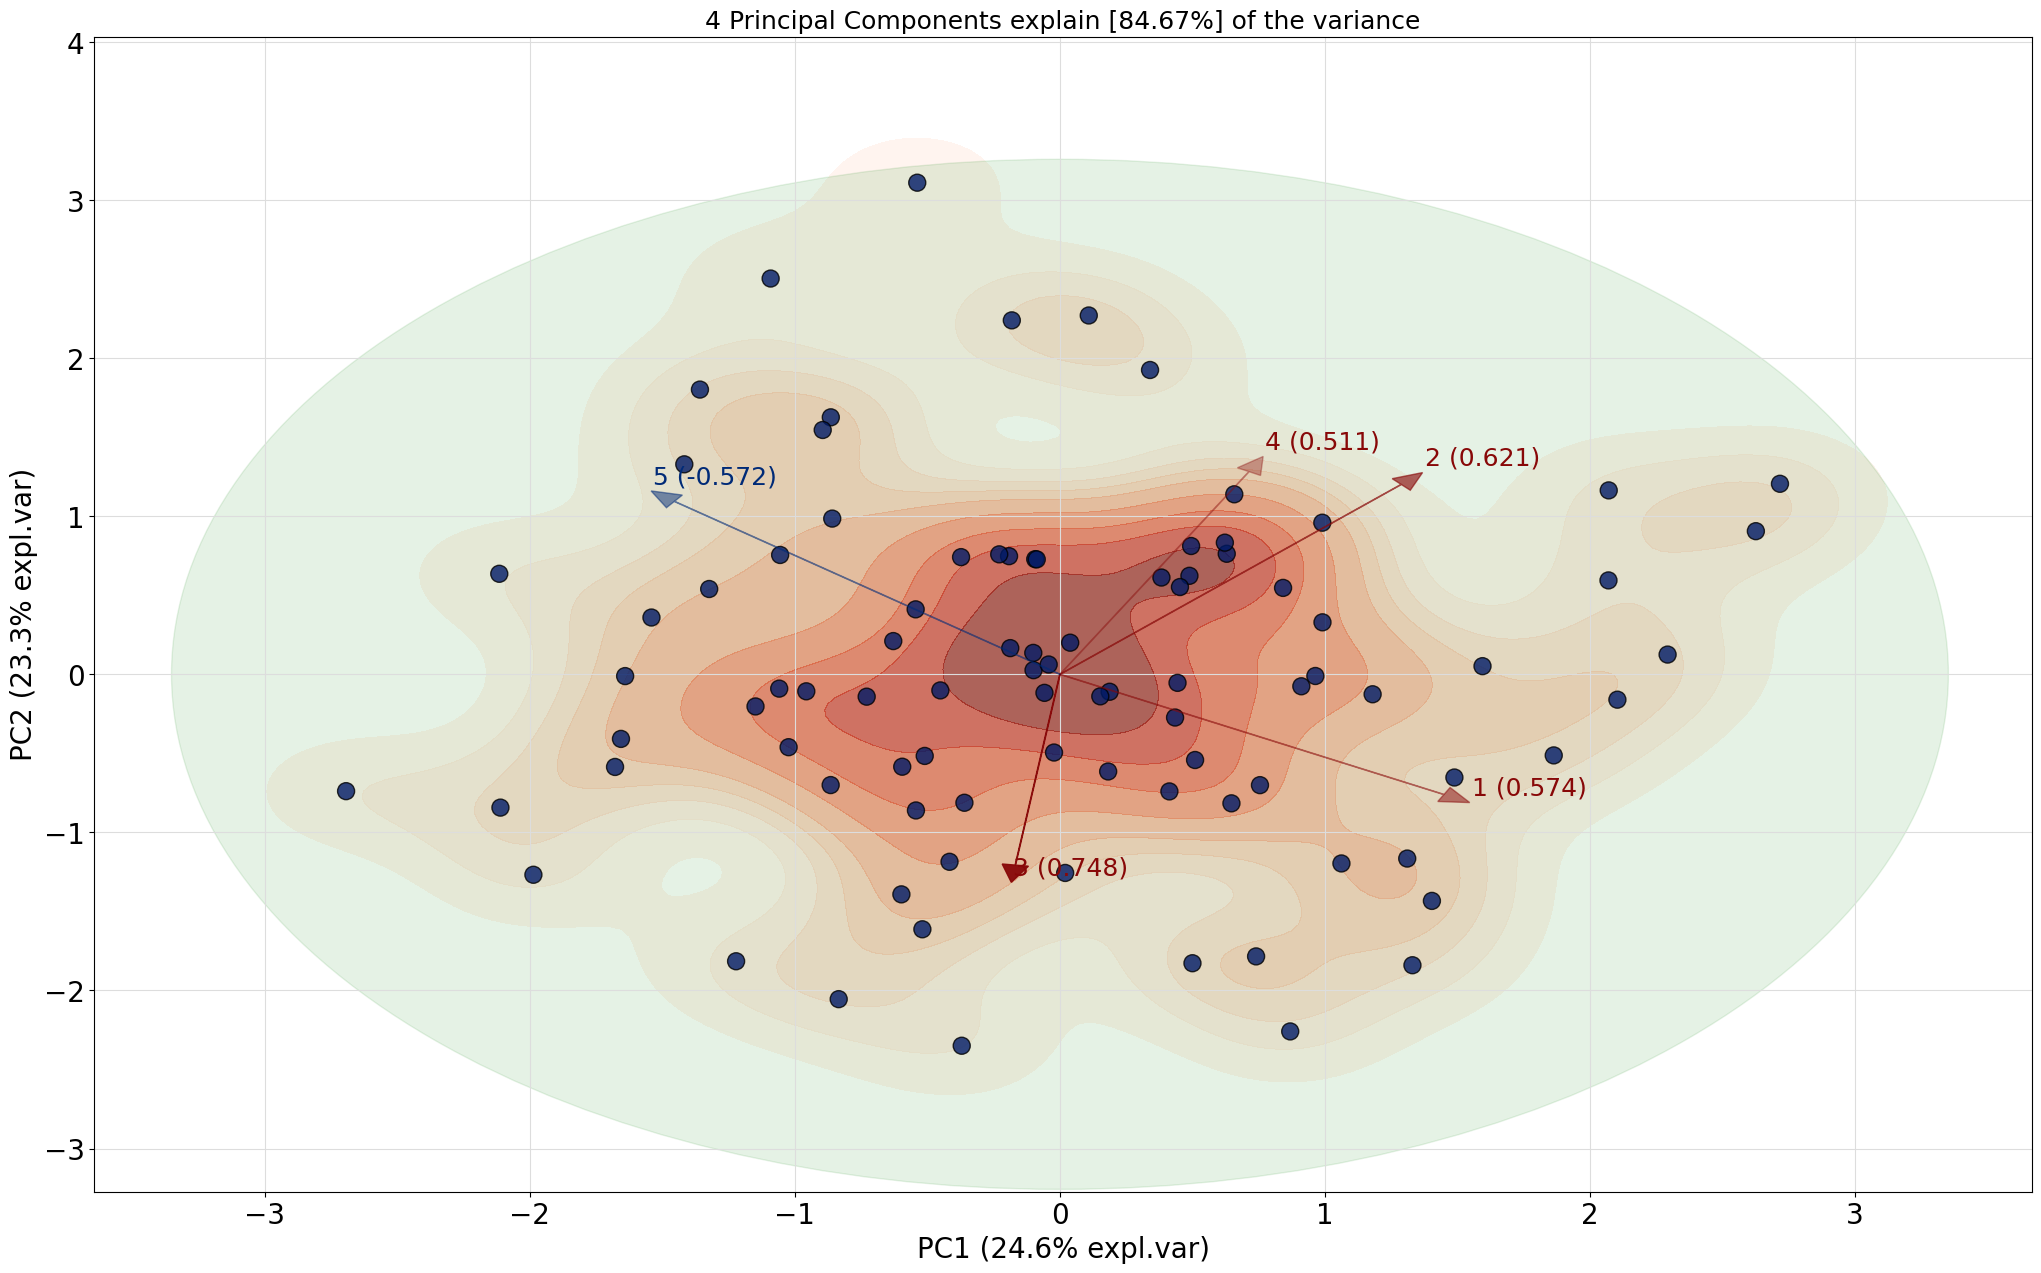

In [14]:
model.biplot(SPE=True, HT2=True, density=True)

#### HT2

In [15]:
results['outliers'][results['outliers']['y_bool'] == True]

,y_proba,p_raw,y_score,y_bool,y_bool_spe,y_score_spe


In [16]:
results['outliers'].sort_values('y_score')

,y_proba,p_raw,y_score,y_bool,y_bool_spe,y_score_spe
22,0.971969,0.971969,2.260414,False,False,0.495246
88,0.971969,0.966960,2.383075,False,False,0.203777
54,0.971969,0.962724,2.478534,False,False,0.130984
43,0.969154,0.936849,2.959895,False,False,0.725865
7,0.963421,0.920602,3.208462,False,False,0.462554
...,...,...,...,...,...,...
49,0.893582,0.071479,14.418935,False,False,3.156140
87,0.893582,0.058540,15.031309,False,False,2.731222
27,0.893582,0.056701,15.128171,False,False,1.041457
65,0.893582,0.046270,15.739113,False,False,2.246476


#### SPE

In [17]:
results['outliers'][results['outliers']['y_bool_spe'] == True]

,y_proba,p_raw,y_score,y_bool,y_bool_spe,y_score_spe


In [18]:
results['outliers'].sort_values('y_score_spe')

,y_proba,p_raw,y_score,y_bool,y_bool_spe,y_score_spe
85,0.949937,0.709145,5.444823,False,False,0.075301
59,0.949937,0.721094,5.336362,False,False,0.103090
54,0.971969,0.962724,2.478534,False,False,0.130984
41,0.935323,0.654726,5.933096,False,False,0.168822
88,0.971969,0.966960,2.383075,False,False,0.203777
...,...,...,...,...,...,...
87,0.893582,0.058540,15.031309,False,False,2.731222
47,0.893582,0.146363,12.110008,False,False,2.777411
55,0.893582,0.078921,14.110869,False,False,2.792976
53,0.893582,0.023062,17.764654,False,False,2.971919


#### 对测试集拟合模型

In [19]:
res_test = model.transform(df_test)
res_test

[pca] >Column labels are auto-completed.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


,PC1,PC2,PC3,PC4
mapped,0.910405,1.102353,-0.634615,-0.307109
mapped,-0.171379,2.314191,1.438058,-0.325684
mapped,-0.592801,0.506708,0.224481,0.070463
mapped,0.259620,0.593576,-0.311711,-1.912869
mapped,0.300498,0.247962,0.578713,-0.733133
mapped,1.073903,0.396654,-1.734037,-0.413333
mapped,1.248217,-0.987856,0.093033,-1.080469
mapped,0.673283,0.058653,-0.066608,-0.505270
mapped,1.470958,-0.134980,-1.308919,0.737956
mapped,0.456794,0.733800,0.177123,-0.969183


In [20]:
results['outliers'][results['outliers']['y_bool'] == True]

,y_proba,p_raw,y_score,y_bool,y_bool_spe,y_score_spe
100,3.038220e-06,1.446771e-07,47.132421,True,False,4.749790
101,1.646781e-10,1.568362e-12,72.487785,True,True,9.321955
102,1.645130e-06,6.267161e-08,49.032526,True,True,7.904449
103,9.563780e-09,2.732508e-10,61.181012,True,True,7.058065
104,4.890321e-09,9.314897e-11,63.554193,True,True,8.606519


In [21]:
results['outliers'].sort_values('y_score').tail(10)

,y_proba,p_raw,y_score,y_bool,y_bool_spe,y_score_spe
27,9.927055e-01,3.541199e-01,8.861433,False,False,1.206464
55,9.927055e-01,3.492183e-01,8.918494,False,False,3.173839
87,9.927055e-01,3.332365e-01,9.108372,False,False,2.570862
33,9.927055e-01,3.305957e-01,9.140341,False,False,2.112035
53,9.927055e-01,2.717552e-01,9.905027,False,False,2.574926
100,3.038220e-06,1.446771e-07,47.132421,True,False,4.749790
102,1.645130e-06,6.267161e-08,49.032526,True,True,7.904449
103,9.563780e-09,2.732508e-10,61.181012,True,True,7.058065
104,4.890321e-09,9.314897e-11,63.554193,True,True,8.606519
101,1.646781e-10,1.568362e-12,72.487785,True,True,9.321955


[scatterd] >INFO> Add density layer
[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <AxesSubplot: title={'center': '4 Principal Components explain [84.67%] of the variance'}, xlabel='PC1 (24.6% expl.var)', ylabel='PC2 (23.3% expl.var)'>)

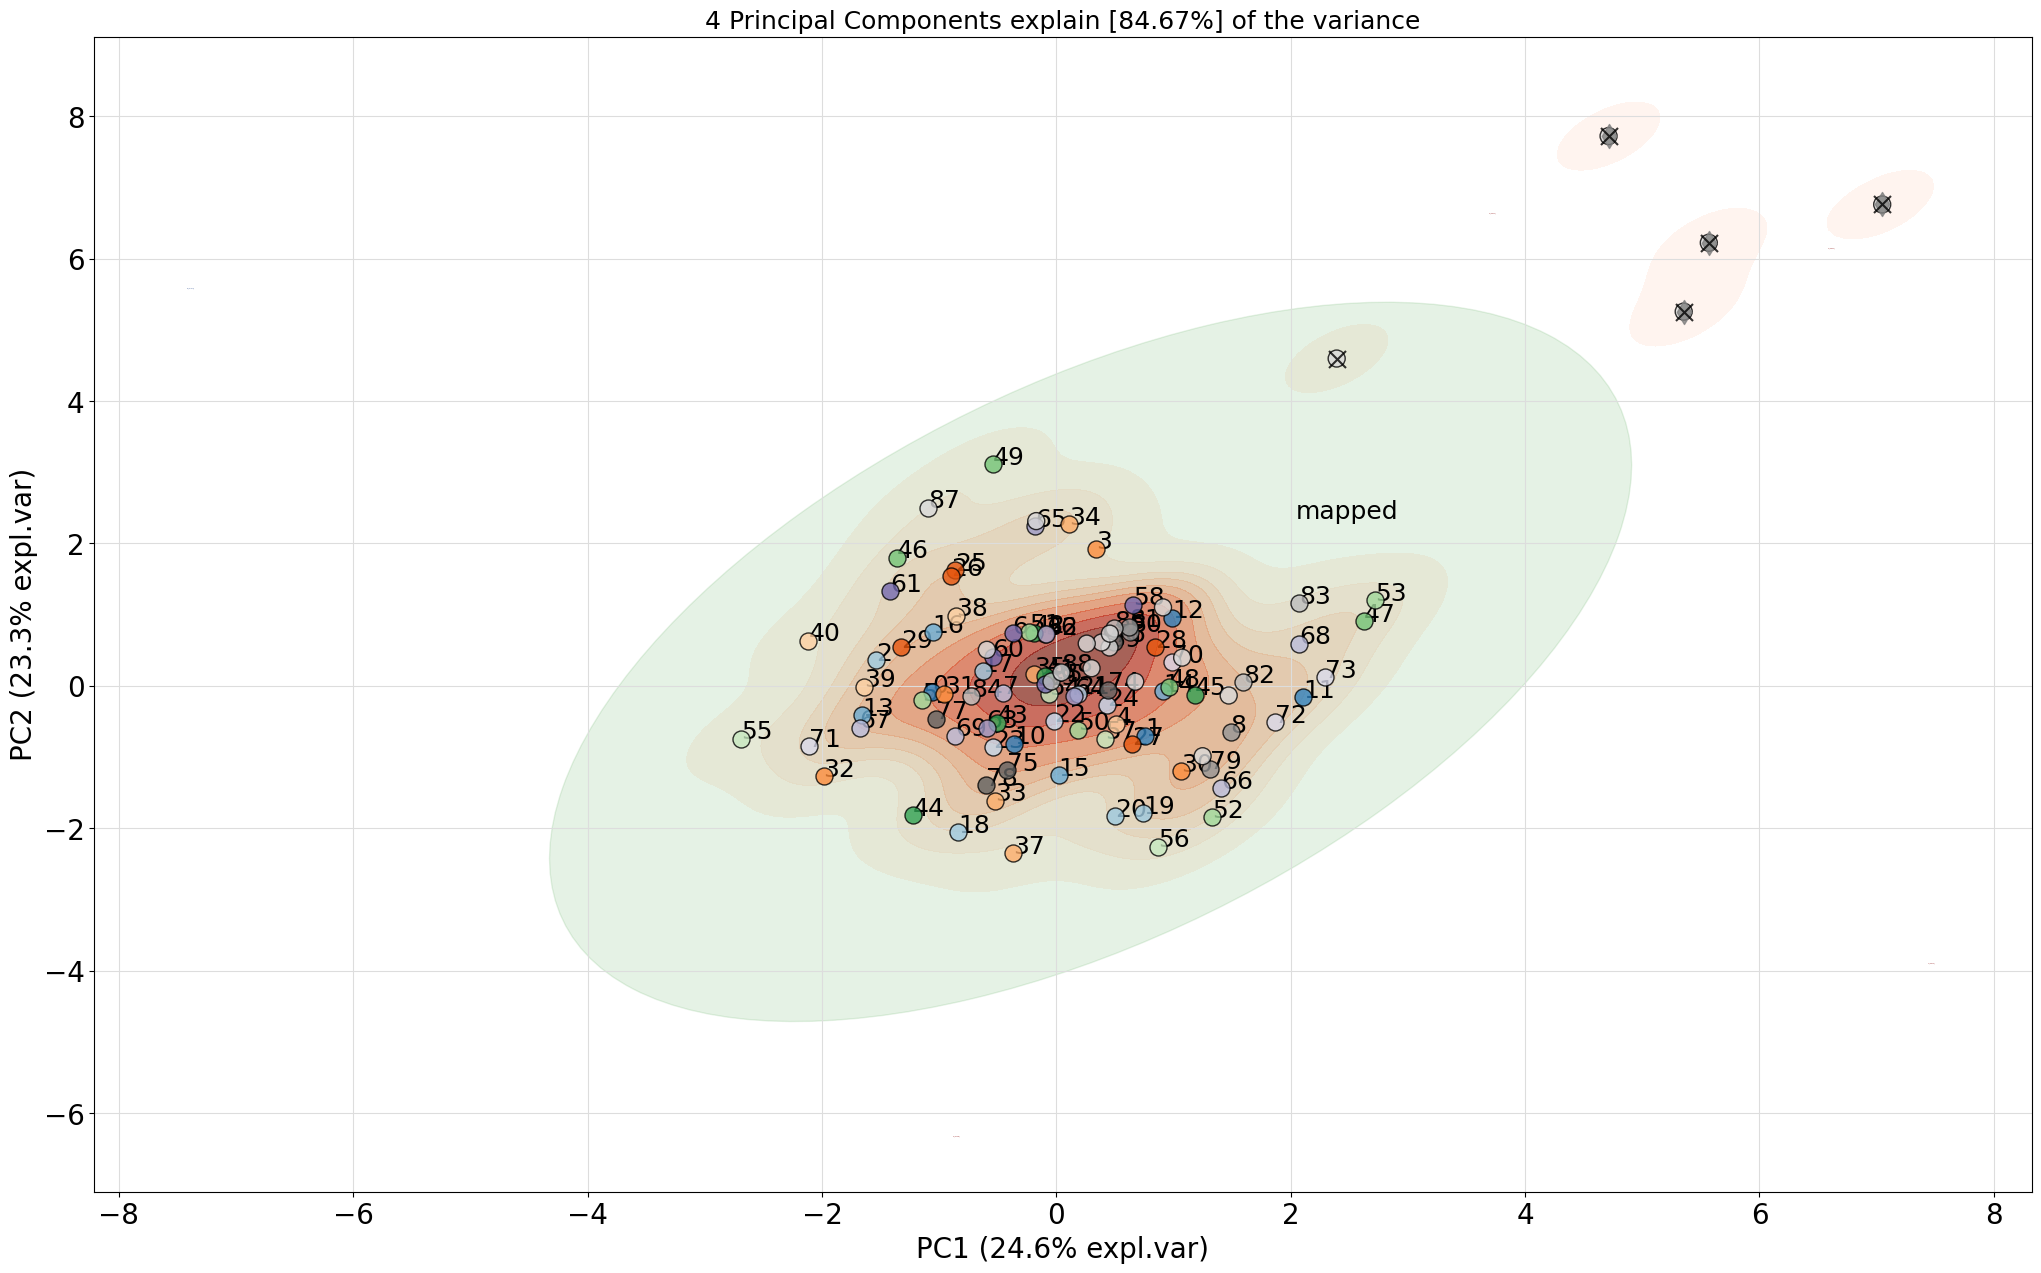

In [22]:
model.biplot(SPE=True, HT2=True, density=True,
             arrowdict={'fontsize': False, 'color_text': None, 'weight': False, 'alpha': False}) 

In [25]:
results['outliers'][results['outliers']['y_bool_spe'] == True]

,y_proba,p_raw,y_score,y_bool,y_bool_spe,y_score_spe
101,1.646781e-10,1.568362e-12,72.487785,True,True,9.321955
102,1.645130e-06,6.267161e-08,49.032526,True,True,7.904449
103,9.563780e-09,2.732508e-10,61.181012,True,True,7.058065
104,4.890321e-09,9.314897e-11,63.554193,True,True,8.606519


In [28]:
results['outliers'].sort_values('y_score_spe').tail(10)

,y_proba,p_raw,y_score,y_bool,y_bool_spe,y_score_spe
71,9.927055e-01,5.232077e-01,7.125004,False,False,2.677629
37,9.927055e-01,4.785580e-01,7.550534,False,False,2.767213
32,9.927055e-01,4.868620e-01,7.470101,False,False,2.787535
49,9.927055e-01,4.147150e-01,8.194397,False,False,2.894615
55,9.927055e-01,3.492183e-01,8.918494,False,False,3.173839
100,3.038220e-06,1.446771e-07,47.132421,True,False,4.749790
103,9.563780e-09,2.732508e-10,61.181012,True,True,7.058065
102,1.645130e-06,6.267161e-08,49.032526,True,True,7.904449
104,4.890321e-09,9.314897e-11,63.554193,True,True,8.606519
101,1.646781e-10,1.568362e-12,72.487785,True,True,9.321955
